In [3]:
import pandas as pd
from pathlib import Path
from transformers import pipeline

# 1. Set your folder path where the newspaper text files are stored
folder_path = Path("../Corpus_deepseek_cleaned")

# 2. Load a pre-trained sentiment analysis model (BERT-based)
nlp = pipeline("sentiment-analysis")

# 3. Create a list to store results
results = []

# 4. Loop through all text files in the folder
for file in folder_path.glob("*.txt"):
    with open(file, "r", encoding="utf-8") as f:
        text = f.read()
    
    # Hugging Face models have token limits, so split long texts into chunks
    chunks = [text[i:i+512] for i in range(0, len(text), 512)]  
    
    # Analyze each chunk
    chunk_results = nlp(chunks)
    
    # Calculate average sentiment score
    score_sum = 0
    pos_score = 0
    neg_score = 0
    for r in chunk_results:
        score = r['score']
        score_sum += score
        if r['label'] == 'POSITIVE':
            pos_score += score
        else:
            neg_score += score
    
    avg_score = score_sum / len(chunk_results)
    final_label = "POSITIVE" if pos_score >= neg_score else "NEGATIVE"
    
    results.append({
        "document": file.name,
        "sentiment": final_label,
        "avg_confidence": round(avg_score, 3)
    })

# 5. Save results to CSV
df = pd.DataFrame(results)
df.to_csv("sentiment_transformers_deepseek.csv", index=False)
print("Sentiment analysis completed! Results saved to sentiment_transformers_deepseek.csv")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Sentiment analysis completed! Results saved to sentiment_transformers_deepseek.csv


In [12]:
import pandas as pd

df = pd.read_csv("sentiment_transformers_deepseek.csv")
print(df.head())


                                            document sentiment  avg_confidence
0  What_is_DeepSeek,_the_Chinese_AI_startup_that_...  NEGATIVE           0.910
1  Chinese_AI_disrupter_DeepSeek_claims_top_spot_...  POSITIVE           0.958
2  Which_countries_have_banned_DeepSeek_and_why?.txt  NEGATIVE           0.991
3  DeepSeek_just_blew_up_the_AI_industry’s_narrat...  NEGATIVE           0.909
4  OpenAI_Says_DeepSeek_May_Have_Improperly_Harve...  NEGATIVE           0.982


Matplotlib is building the font cache; this may take a moment.


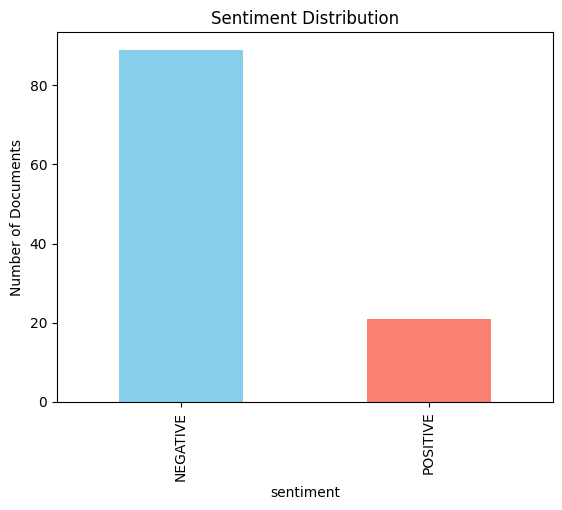

In [14]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Documents")
plt.show()


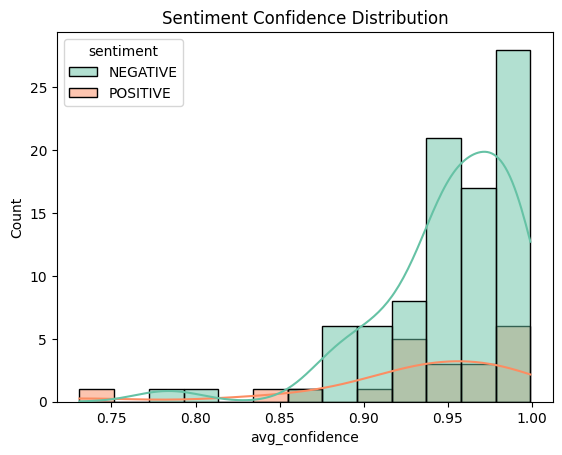

In [16]:
import seaborn as sns

sns.histplot(data=df, x='avg_confidence', hue='sentiment', kde=True, palette='Set2')
plt.title("Sentiment Confidence Distribution")
plt.show()
